# Harden Stats Part 2

* Load in our updated game logs for James Harden
* Use group by to view stats by segment
* Plot basic graphs with Pandas

### Import data and load csv

In [1]:
import pandas as pd

import os
#Make sure to write about need to pip install matplotlib
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
os.chdir('./game_logs')
df = pd.read_csv('2018_19_Harden_James.csv')
df.head(3)

,game_season,date_game,age,team_id,opp_id,game_result,gs,mp,fg,fga,...,pf,pts,game_score,plus_minus,g,home_game,win,pts_per_36,trb_per_36,tov_per_12
0,1.0,2018-10-17,29-052,HOU,NOP,L (-19),1.0,34.7,6.0,15.0,...,2.0,18.0,18.9,-23.0,1,1,0,18.7,9.3,1.4
1,2.0,2018-10-20,29-055,HOU,LAL,W (+9),1.0,37.8,10.0,19.0,...,2.0,36.0,27.0,-3.0,1,0,1,34.3,6.7,1.9
2,3.0,2018-10-21,29-056,HOU,LAC,L (-3),1.0,39.8,11.0,26.0,...,1.0,31.0,26.4,5.0,1,0,0,28.0,3.6,0.9


### Learning Groupby

In [54]:
df.groupby(['win'])['pts'].mean().round(1)

win
0    34.4
1    37.0
Name: pts, dtype: float64

In [55]:
df.groupby(['home_game', 'win'])['pts'].agg(games ='count',avg_pts='mean')

games    avg_pts
home_game win                  
0         0       19  34.210526
          1       20  34.400000
1         0        8  35.000000
          1       31  38.709677

### Basic Plotting in Pandas

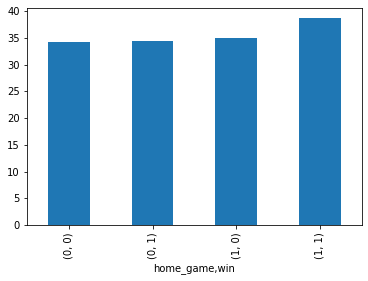

In [21]:
df.groupby(['home_game', 'win'])['pts'].mean().round(1).plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1194fef60>,
      dtype=object)

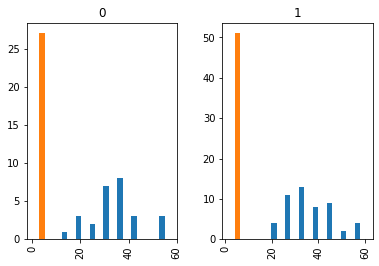

In [22]:
df[['pts', 'win']].hist(by= 'win')

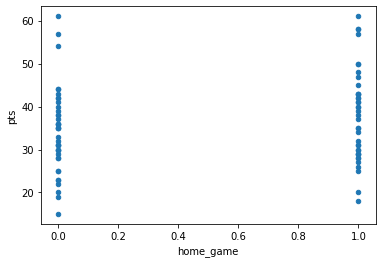

In [62]:
df[['home_game', 'pts']].plot(kind='scatter', x = 'home_game', y = 'pts')

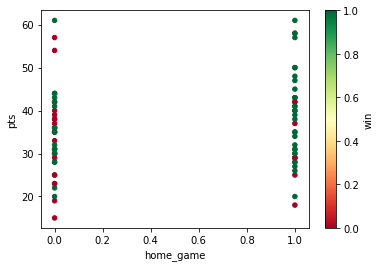

In [28]:
df[['home_game', 'pts', 'win']].plot(kind='scatter', 
                                     x = 'home_game', 
                                     y = 'pts', 
                                     c= 'win', 
                                     cmap = 'RdYlGn',
                                     sharex=False)

### The value of pivot tables

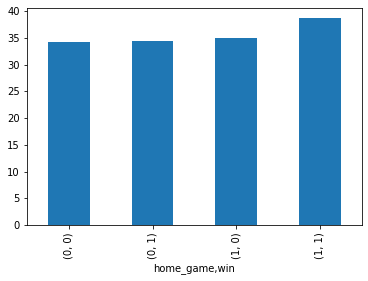

In [66]:
df.groupby(['home_game', 'win'])['pts'].mean().plot(kind='bar')

In [75]:
hpts=df[df.win==1].groupby(['home_game'])['pts'].mean()
apts= df[df.win==0].groupby(['home_game'])['pts'].mean()
pd.DataFrame({'home':hpts, 'away':apts})

,home,away
home_game,,
0,34.400000,34.210526
1,38.709677,35.000000


In [77]:
df.pivot_table(index= 'home_game', columns= 'win', values= 'pts', aggfunc=np.mean)

win,0,1
home_game,,
0,34.210526,34.400000
1,35.000000,38.709677


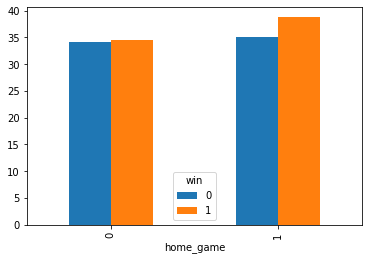

In [76]:
df.pivot_table(index= 'home_game', columns= 'win', values= 'pts', aggfunc=np.mean).plot(kind='bar')